<a href="https://colab.research.google.com/github/LalithaJanneti/House-price-prediction/blob/main/StudentScorePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Load Dataset

In [2]:
from google.colab import files
uploaded=files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [6]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Data Preprocessing

In [12]:
#check for missing values
print(df.isnull().sum())

#encode categorical values if present
df=pd.get_dummies(df,drop_first=True)
print(df.columns)
#features and target
#X=df.drop("Performance Index",axis=1)
#y=df["Performance Index"]

math score                                       0
reading score                                    0
writing score                                    0
gender_male                                      0
race/ethnicity_group B                           0
race/ethnicity_group C                           0
race/ethnicity_group D                           0
race/ethnicity_group E                           0
parental level of education_bachelor's degree    0
parental level of education_high school          0
parental level of education_master's degree      0
parental level of education_some college         0
parental level of education_some high school     0
lunch_standard                                   0
test preparation course_none                     0
dtype: int64
Index(['math score', 'reading score', 'writing score', 'gender_male',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of educatio

Performance Index=average of math score,reading,writing score

In [13]:
df["Performance Index"]=df[["math score","reading score","writing score"]].mean(axis=1)

X=df.drop("Performance Index",axis=1)
y=df["Performance Index"]

Train Test split

In [15]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

train the model

In [16]:
model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

MSE: 2.364689449490505e-28
MAE: 1.426414542038401e-14
R2 score: 1.0


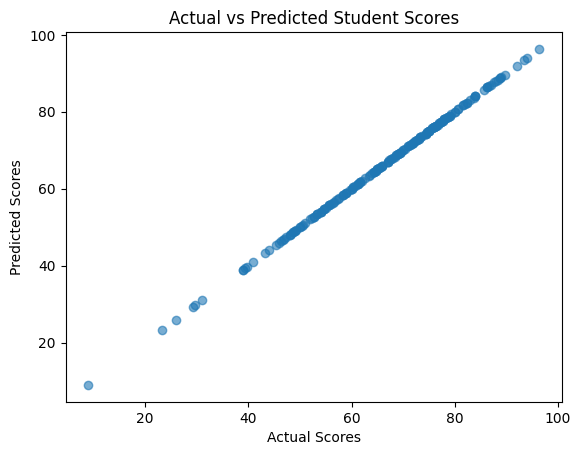

In [17]:
# Step 9: Visualization
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Student Scores")
plt.show()